# Exercise: Model Resolution

## Background

### Motivation

During our lecture on climate models, we discussed the importance of model resolution for understanding local and regional climate. Coarse climate model output (tradiationally at  $1^\circ \times 1^\circ$ or $2^\circ \times 2^\circ$) lacks sufficient detail to resolve topography, like the Blue Ridge Mountains, and local climate patterns 

Current operational climate models, like the [CMIP-6 (Coupled Model Intercomparison Project - Phase 6)](https://wcrp-cmip.org/cmip6/) models operate at a resolution of $1.25^\circ \, \text{latitude} \times 2.5^\circ \, \text{longitude}$, which corresponds roughly to spatial grid resolutions of 100 to 250\,km . 

Using today's computational power, it is possible to run climate models at resolutions of 30-50 km over climate relevant timescales (i.e. the end of the century). 

[Experimental climate models](https://eos.org/features/are-we-entering-the-golden-age-of-climate-modeling), are currently run at spatial resolutions of 3-5 km, but this cannot yet be done globally for long periods. 

**Today's exercise is aimed at directly visualizing the difference in detail in such simulations using rainfall in Virginia as an example.**

### Dataset

For this, we will be working with [PRISM High-Resolution Climate Data](https://www.nacse.org/prism/). 

**Note that this is not climate model data, but data from observations. This allows us to look at data with higher-resolution than available in typical climate model simulations.** 

> PRISM is a set of monthly, yearly, and single-event gridded data products of mean temperature and precipitation, max/min temperatures, and dewpoints, primarily for the United States. In-situ point measurements are ingested into the PRISM (Parameter elevation Regression on Independent Slopes Model) statistical mapping system. The PRISM products use a weighted regression scheme to account for complex climate regimes associated with orography, rain shadows, temperature inversions, slope aspect, coastal proximity, and other factors. [UCAR Climate Data Guide](https://climatedataguide.ucar.edu/climate-data/prism-high-resolution-spatial-climate-data-united-states-maxmin-temp-dewpoint)

The dataset is available at 800 m resolution throughout the contiguous US, but requires a license. Here, we use the free version with a resolution of 4 km.

![](../assets/PRISM_ppt_early_4kmD2_MTD_20240415_small.png)

_Figure 1: Example of PRISM precipitation data for April, 2024 with 4 km resolution. Credit:[PRISM Climate Group](https://prism.oregonstate.edu/mtd/)_

#### Data Preparation

For this exercise, I downloaded the average annual precipitation at 4 km dataset available from the [PRISM website](https://prism.oregonstate.edu/normals/). I then processed the data, which was available in binary format to netCDF file format.

## Learning Goals

**Technical**

This exercise practices several skills that we have previously encountered:

- Opening and reading datasets using _xarray_
- Selecting and subsetting variables from an _xarray_- dataset.
- Plotting _xarray_ data on maps. 

**Climate System**

After completing this exercise you should be able to

- recognize the importance of high resolution climate data for local and regional climate adaptation
- compare and contrast precipitation patterns near Harrisonburg at different resolutions

In [2]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import glob

## Data Analysis

### Reading the data to _xarray

First, and as always we have to read in the data as an _xarray_ dataset. 

The data file is named `PRISM_ppt_30yr_normal_4kmM4_annual.nc` and located in the `data` directory. 


In [3]:
pathToFile = '...'
ds_4km = xr.open_dataset(pathToFile)

Let's inspect the dataset to see what we have.  

In [4]:
ds_4km

<xarray.Dataset> Size: 3MB
Dimensions:  (lon: 1405, lat: 621)
Coordinates:
  * lon      (lon) float32 6kB -125.0 -125.0 -124.9 ... -66.6 -66.56 -66.52
  * lat      (lat) float32 2kB 49.94 49.9 49.85 49.81 ... 24.23 24.19 24.15 24.1
Data variables:
    precip   (lat, lon) float32 3MB ...

Based on the information abovem you can see that it is a 2D dataset with `lat` and `lon` coordinates (i.e. something we can plot on a map). There is a single variable in the dataset called `precip`, which corresponds to precipitation in mm/year. 

### Dataset processing

To help us visualize the impact of resolution, let's ***decrease (or coarsen)*** the spatial resolution. _xarray_ has a built in function that can do that (`.coarsen()`).  

What we do below is to 

1. first average the data over 10 gridpoints in the latitude direction and then
2. to do the same in the longitude direction.
3. Finally, we save a copy of that data into a new _xarray_ dataset.
   
This means, instead of the inital spatioal resolution of 4 km x 4 km, we now have a resolution of 40 km x 40 km, which is similar to a cutting edge climate model. 

In [5]:
ds_40km = ds_4km.coarsen(lat=10, boundary='trim').mean().coarsen(lon=10, boundary='trim').mean()

Try doing the same thing to coarsen the resolution to 200 km x 200 km (i.e. the resolution of a traditional climate model as they were run just a few years ago). 

In [95]:
ds_200km = ...

### Data Visualization 

Now let's see how different they look. 

I first set up some basic figure properties, you don't have to change this.  

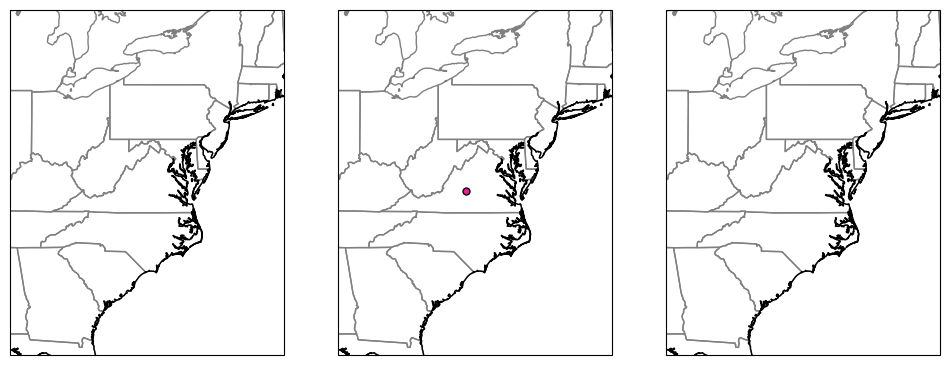

In [12]:
hBurgLat = 38.44957 # Latitude of Harrisonburg for visualization
hBurgLon = -78.86892 # Longitude of Harrisonburg for visualization

midAtlanticBox = [-86, 30, -71, 45] # coordinates to set the extent of the map

# I am setting up a figure object with 3 subplots and a map projection
fig, ax = plt.subplots(ncols=3, figsize=(12,6), subplot_kw=dict(projection=ccrs.Mercator()))

# ax refers to the subplot object and goes from 0 to 2. 
# Here i am looping over all subplots to add the statelines and to set the boundary of the plotted map.
for i in range(3):
    ax[i].set_extent([midAtlanticBox[0], midAtlanticBox[2], midAtlanticBox[1], midAtlanticBox[3]], ccrs.PlateCarree())
    ax[i].add_feature(cartopy.feature.STATES,edgecolor='grey')
    ax[i].coastlines(linewidth=1)

# I can also go to a specific subplot.
# For example to add a point at the center of the to the second subplot, I could do.
ax[1].scatter(-79, 37.5, c='deeppink', s=25, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())


Now let's redo this, and plot the 4 km data onto the generated map.

We also add a marker for Harrisonburg, a nice figure title, and a colorbar legend. 


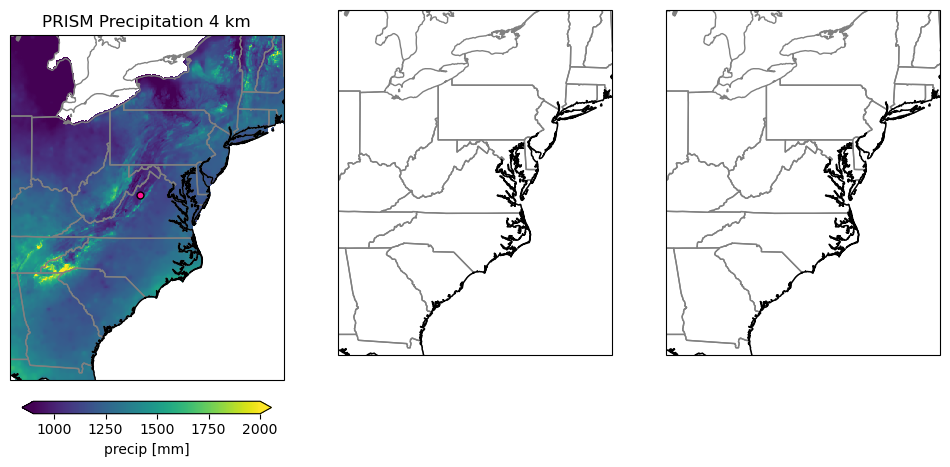

In [13]:
# I am setting up a figure object with 3 subplots and a map projection
fig, ax = plt.subplots(ncols=3, figsize=(12,6), subplot_kw=dict(projection=ccrs.Mercator()))

# ax refers to the subplot object and goes from 0 to 2. 
for i in range(3):
    ax[i].set_extent([midAtlanticBox[0], midAtlanticBox[2], midAtlanticBox[1], midAtlanticBox[3]], ccrs.PlateCarree())
    ax[i].add_feature(cartopy.feature.STATES,edgecolor='grey')
    ax[i].coastlines(linewidth=1)

data = ds_4km.precip.sel(lat=slice(midAtlanticBox[3], midAtlanticBox[1]),lon=slice(midAtlanticBox[0], midAtlanticBox[2]))
data.plot(ax=ax[0], 
          transform=ccrs.PlateCarree(), # we always need this for the map projection
         vmin = 900, vmax = 2000, # this sets the range for the colors
          cbar_kwargs={"orientation": "horizontal", "fraction": 0.027, "pad": 0.045} # this defines the location and size of the colorbar
        )

ax[0].set_title('PRISM Precipitation 4 km')
ax[0].scatter(hBurgLon, hBurgLat, c='deeppink', s=25, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())

**Now it is your turn:**

- Use the code above as a basis to add the 40 km and 200 km datasets.
- Add a title to each subplot.
- Make sure to add the marker for Harrisonburg as well



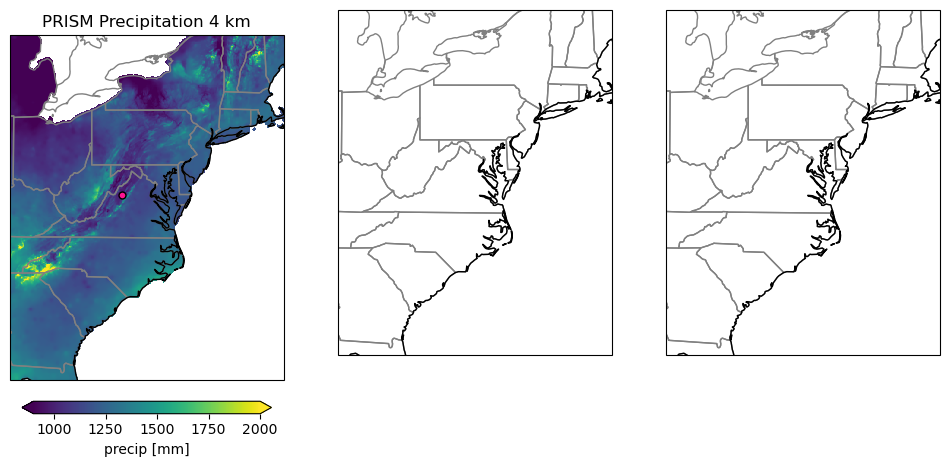

In [96]:
# I am setting up a figure object with 3 subplots and a map projection
fig, ax = plt.subplots(ncols=3, figsize=(12,6), subplot_kw=dict(projection=ccrs.Mercator()))

# ax refers to the subplot object and goes from 0 to 2. 
for i in range(3):
    ax[i].set_extent([midAtlanticBox[0], midAtlanticBox[2], midAtlanticBox[1], midAtlanticBox[3]], ccrs.PlateCarree())
    ax[i].add_feature(cartopy.feature.STATES,edgecolor='grey')
    ax[i].coastlines(linewidth=1)

data = ds_4km.precip.sel(lat=slice(midAtlanticBox[3], midAtlanticBox[1]),lon=slice(midAtlanticBox[0], midAtlanticBox[2]))
data.plot(ax=ax[0], 
          transform=ccrs.PlateCarree(), # we always need this for the map projection
         vmin = 900, vmax = 2000, # this sets the range for the colors
          cbar_kwargs={"orientation": "horizontal", "fraction": 0.027, "pad": 0.045} # this defines the location and size of the colorbar
        )

ax[0].set_title('PRISM Precipitation 4 km')
ax[0].scatter(hBurgLon, hBurgLat, c='deeppink', s=25, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())

## add your code here 



### Discussion:

- Compare the maps
- What do you notice/ find striking
- How much detail do you still see and what does this mean for climate model data to make regional/local decisions